In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('..\data\Crop_recommendation.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Denis\AppData\Local\Temp\ipykernel_11952\1327406374.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Crop_recommendation.csv')


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


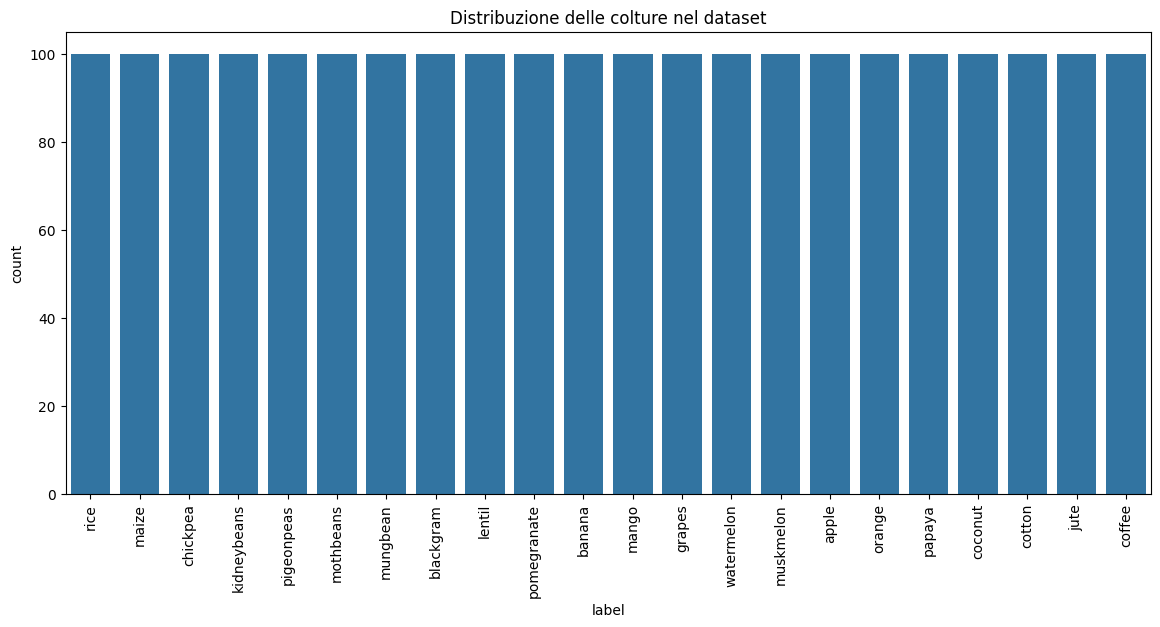

In [9]:
plt.figure(figsize=(14, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribuzione delle colture nel dataset')
plt.show()

Labels perfectly distributed

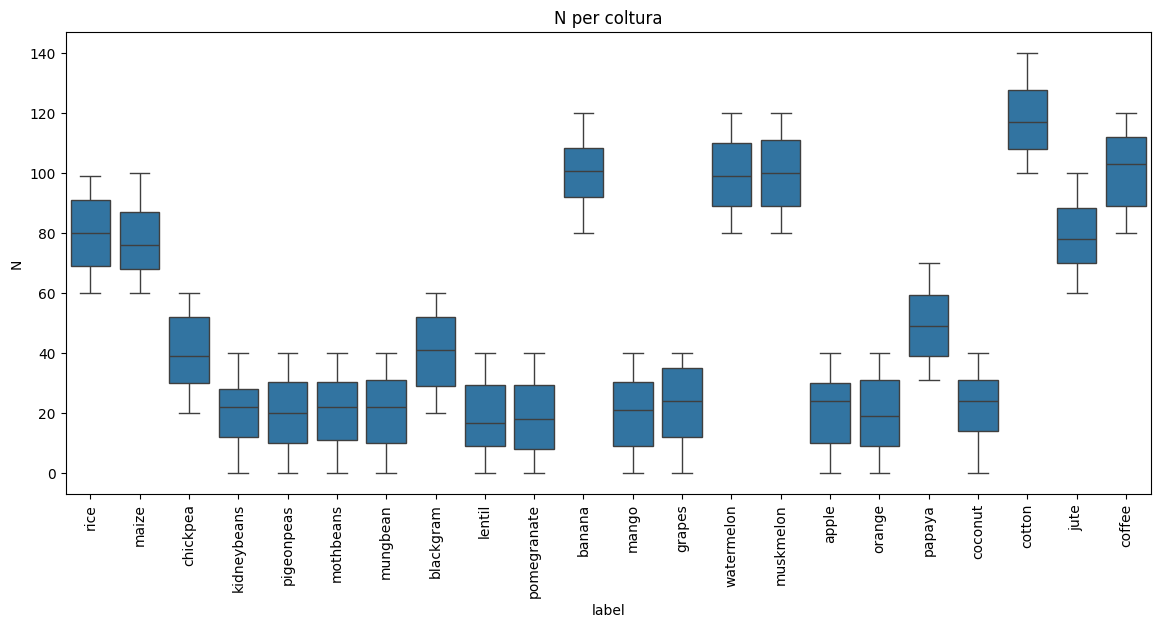

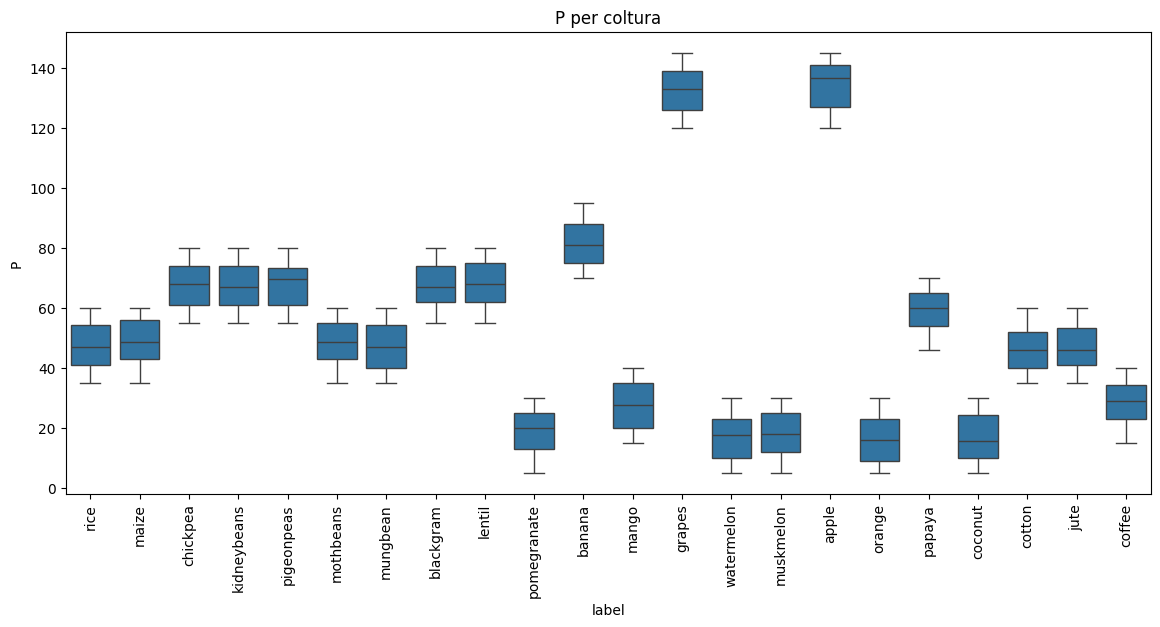

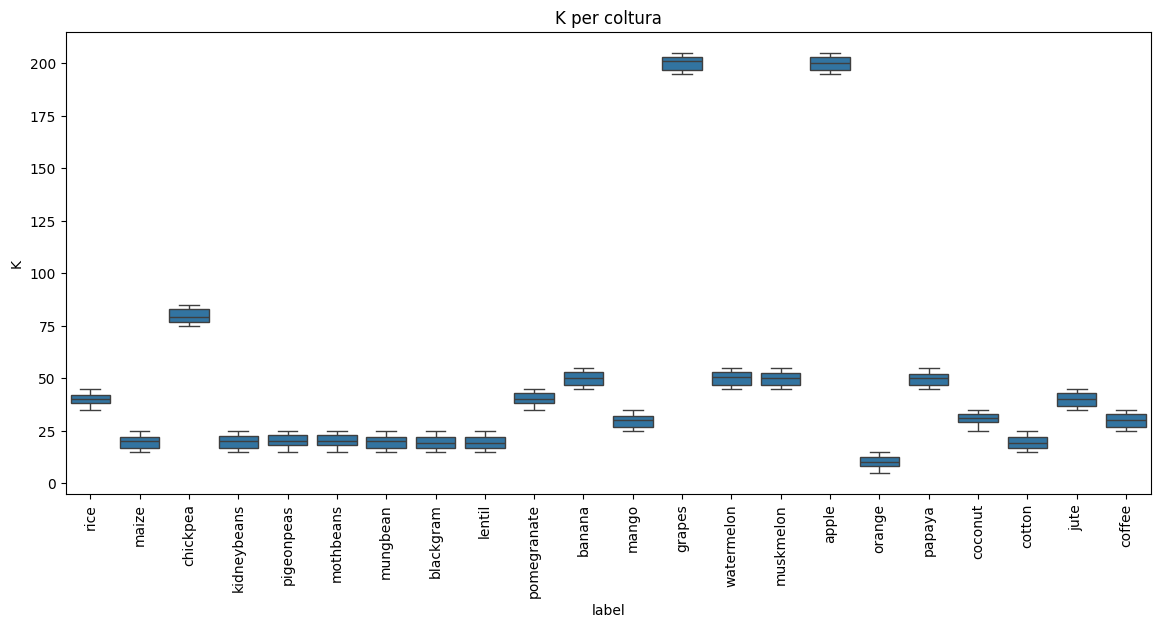

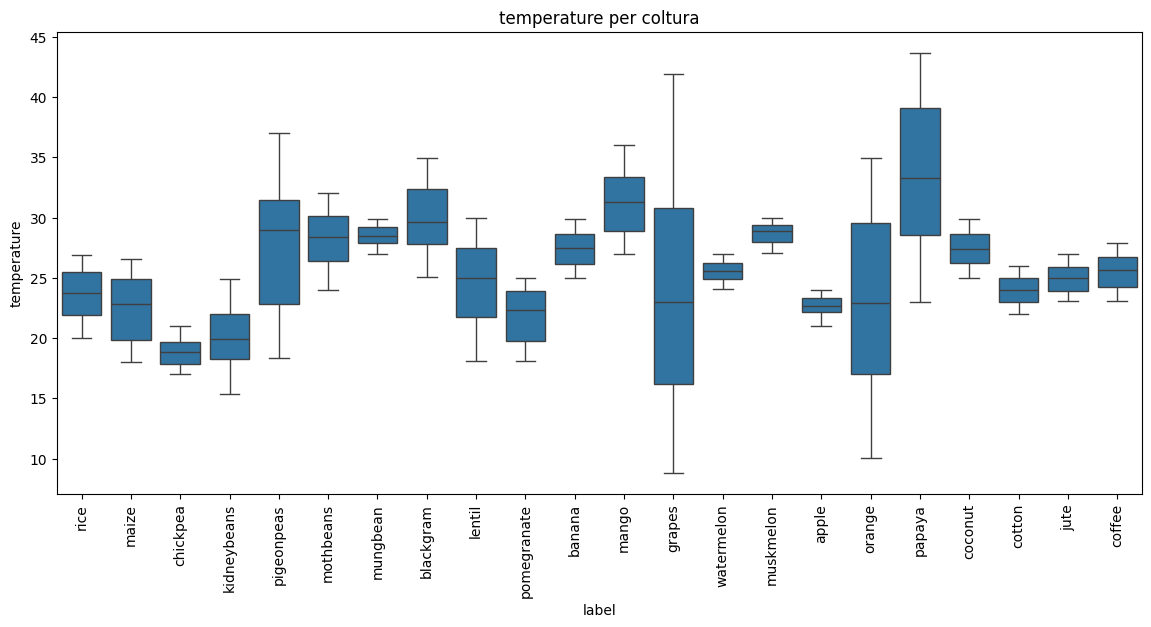

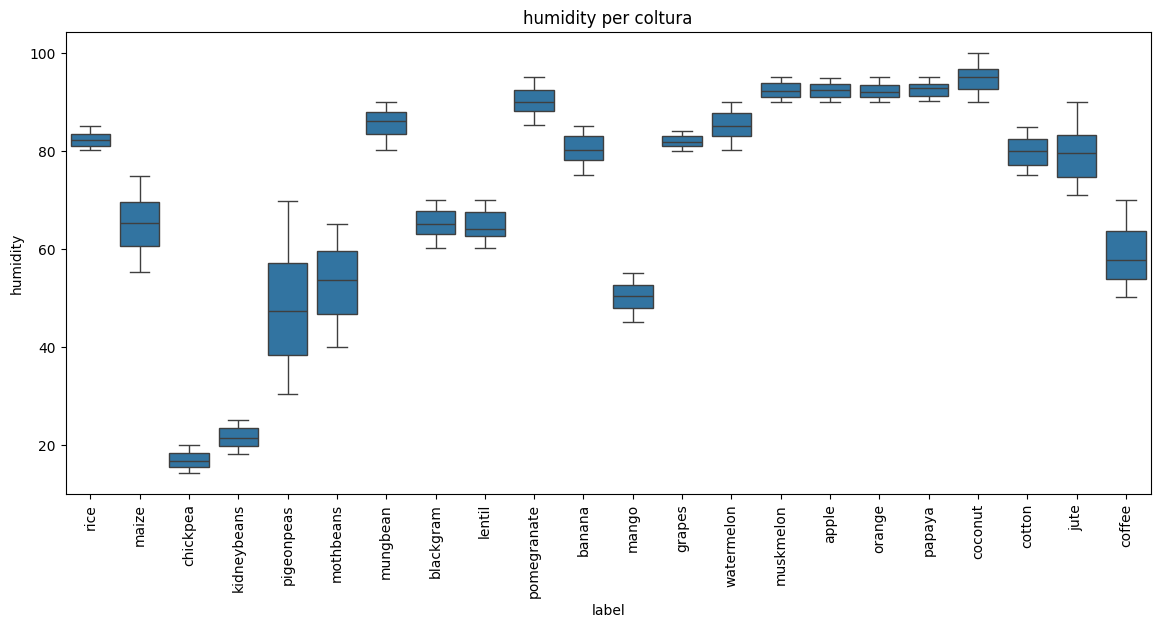

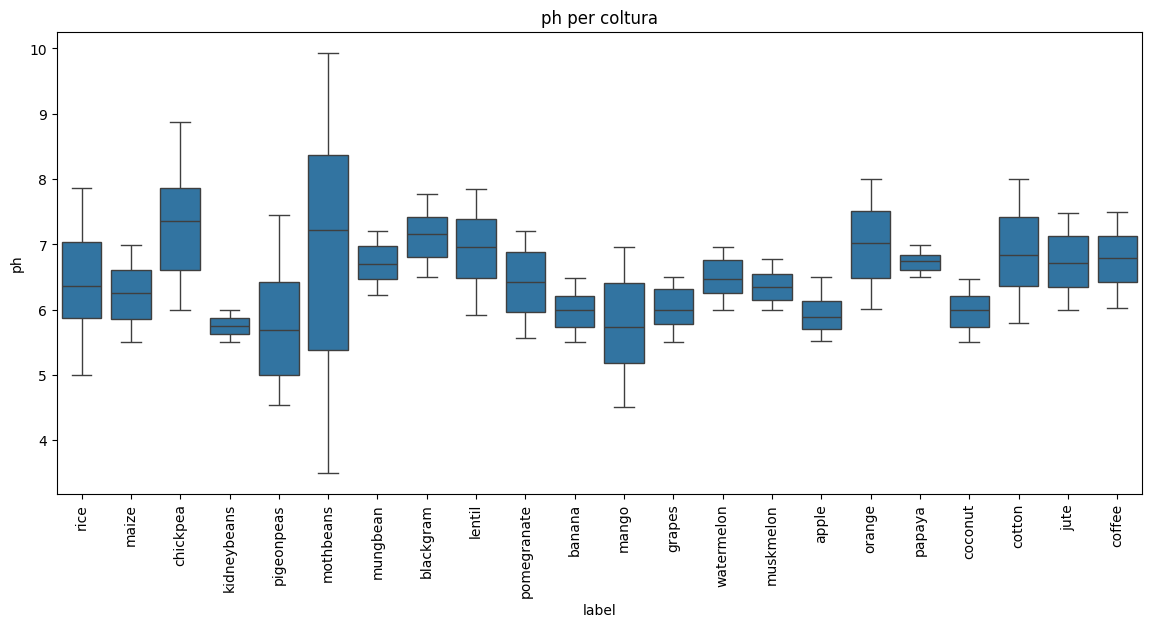

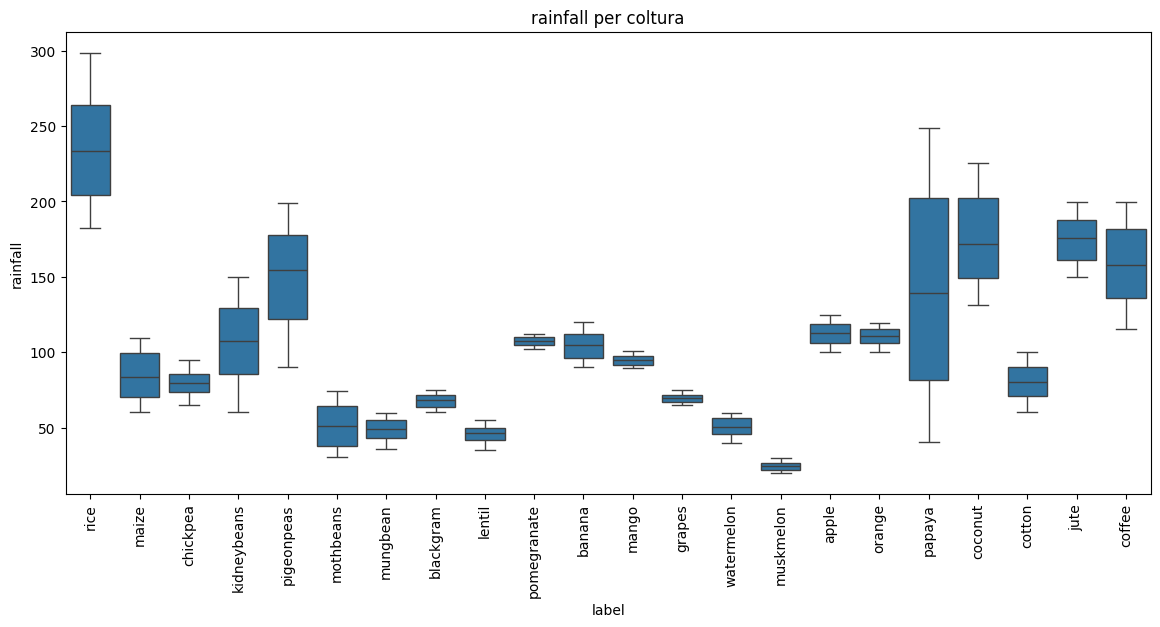

In [10]:
for col in df.columns[:-1]:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='label', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} per coltura')
    plt.show()

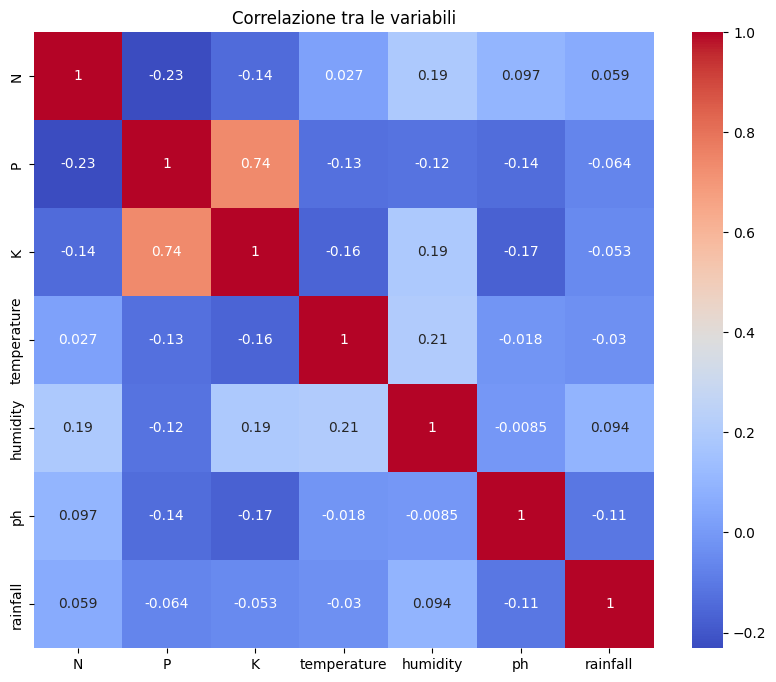

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlazione tra le variabili')
plt.show()

Describe by label

In [12]:
for feature in df.columns[:-1]:  # exclude label
    print(f"\n--- {feature.upper()} ---\n")
    print(df.groupby('label')[feature].describe())


--- N ---

             count    mean        std    min     25%    50%     75%    max
label                                                                     
apple        100.0   20.80  11.863704    0.0   10.00   24.0   30.00   40.0
banana       100.0  100.23  11.107241   80.0   92.00  100.5  108.25  120.0
blackgram    100.0   40.02  12.664258   20.0   28.75   41.0   52.00   60.0
chickpea     100.0   40.09  12.150649   20.0   30.00   39.0   52.00   60.0
coconut      100.0   21.98  11.761931    0.0   13.75   24.0   31.00   40.0
coffee       100.0  101.20  12.345203   80.0   89.00  103.0  112.00  120.0
cotton       100.0  117.77  11.628817  100.0  107.75  117.0  127.50  140.0
grapes       100.0   23.18  12.466829    0.0   11.75   24.0   35.00   40.0
jute         100.0   78.40  10.968274   60.0   70.00   78.0   88.25  100.0
kidneybeans  100.0   20.75  10.834266    0.0   11.75   22.0   28.00   40.0
lentil       100.0   18.77  12.196915    0.0    9.00   16.5   29.25   40.0
maize        

Seeing that N has some 0.0 values, we go a bit deeper on that

In [13]:
zero_counts = df[df['N'] == 0].groupby('label').size().sort_values(ascending=False)


total_zeros = (df['N'] == 0).sum()

percent_zeros = round(100 * total_zeros / len(df), 2)

print("0 by label:\n", zero_counts)
print(f"\nTot 0: {total_zeros} / {len(df)} ({percent_zeros}%)")

0 by label:
 label
coconut        4
orange         4
lentil         4
pomegranate    3
apple          3
mango          3
kidneybeans    2
grapes         1
mothbeans      1
mungbean       1
pigeonpeas     1
dtype: int64

Tot 0: 27 / 2200 (1.23%)


In [14]:
# 27 0.0 replaced with median of each label
df.loc[df['N'] == 0, 'N'] = df[df['N'] > 0].groupby('label')['N'].transform('median')

In [15]:
zero_counts = df[df['N'] == 0].groupby('label').size().sort_values(ascending=False)

total_zeros = (df['N'] == 0).sum()

percent_zeros = round(100 * total_zeros / len(df), 2)

print("0 by label:\n", zero_counts)
print(f"\nTot 0: {total_zeros} / {len(df)} ({percent_zeros}%)")

0 by label:
 Series([], dtype: int64)

Tot 0: 0 / 2200 (0.0%)


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Label Encoding
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 2. Features & Target
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Random Forest training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

Basically perfect but let's make it simpler

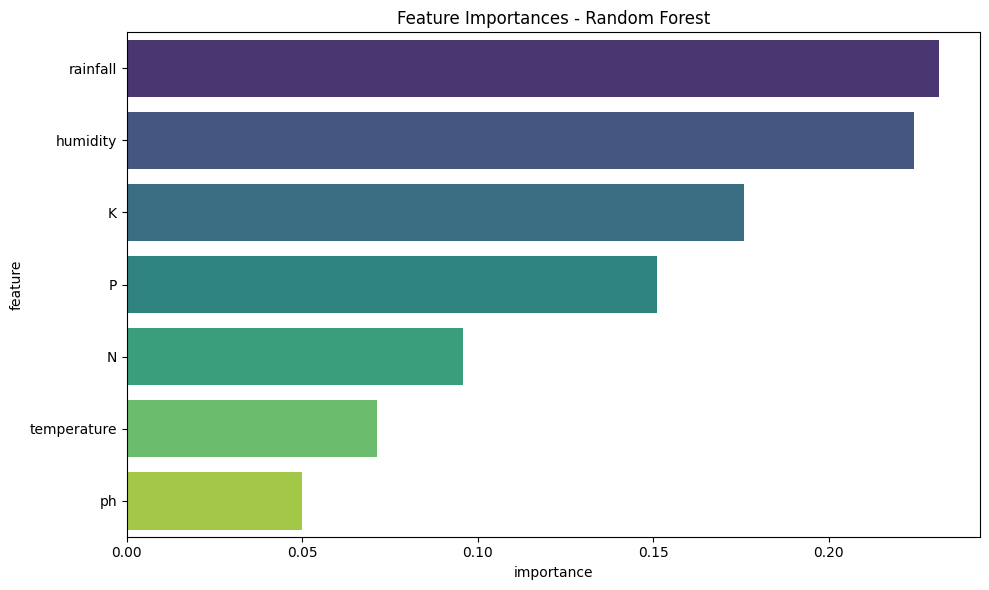

In [17]:
# Feature importance
importances = model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp_df, palette="viridis", hue='feature', legend=False)
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()



In [18]:
top_features = ['rainfall', 'humidity', 'K', 'N'] # K and P have 0.74 correlation so we just keeping K
X_reduced = df[top_features]
y = df['label_encoded']

# 2. Train/Test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Modello
reduced_model = RandomForestClassifier(random_state=42)
reduced_model.fit(X_train_r, y_train_r)

# 4. Valutazione
y_pred_r = reduced_model.predict(X_test_r)
print(classification_report(y_test_r, y_pred_r, target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.90      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      0.95      0.95        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.90      0.95      0.93        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

Still perfect, but let's work with best practices

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Label Encoding
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 2. Features & Target
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Model with gs and cv
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators':      [100, 200],
    'max_depth':         [None, 10, 20],
    'min_samples_leaf':  [1, 3, 5],
    'max_features':      ['sqrt', 'log2']
}

# 5. cross‑validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. GridSearchCV
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("🏆 GridSearch best params:", grid.best_params_)

# 7. Evaluation
best_rf = grid.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring='accuracy')
cv_results = cross_validate(
    estimator=best_rf,           # l’oggetto RandomForest con max_depth=None
    X=X_train, 
    y=y_train, 
    cv=cv,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)
print(f"✅ CV accuracy (train): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Train accuracy   : {cv_results['train_score'].mean():.4f}")
print(f"Validation accuracy: {cv_results['test_score'].mean():.4f}")

# 8. Evaluation on test set
y_pred = best_rf.predict(X_test)
print("\n📊 Classification Report (test set):")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
🏆 GridSearch best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
✅ CV accuracy (train): 0.9943 ± 0.0048
Train accuracy   : 1.0000
Validation accuracy: 0.9943

📊 Classification Report (test set):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98  

In [20]:
from sklearn.model_selection import cross_validate, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    estimator=best_rf,           # l’oggetto RandomForest con max_depth=None
    X=X_train, 
    y=y_train, 
    cv=cv,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

print(f"Train accuracy   : {cv_results['train_score'].mean():.4f}")
print(f"Validation accuracy: {cv_results['test_score'].mean():.4f}")


Train accuracy   : 1.0000
Validation accuracy: 0.9943


In [21]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier

# iperparametri “conservativi”
param_dist = {
    'n_estimators':      [100, 200, 300],
    'max_depth':         [5, 10, 15],
    'min_samples_leaf':  [1, 3, 5, 10],
    'max_features':      ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,                # esploro 20 combinazioni a caso
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_search.fit(X_train_r, y_train_r)

best_rf = rand_search.best_estimator_
print("🏆 Best params:", rand_search.best_params_)

# confronto Train vs CV con i parametri ottimali
cv_res = cross_validate(
    best_rf, X_train_r, y_train_r, cv=cv,
    scoring='accuracy', return_train_score=True, n_jobs=-1
)
print(f"Train acc.: {cv_res['train_score'].mean():.4f}")
print(f"Valid acc.: {cv_res['test_score'].mean():.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🏆 Best params: {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Train acc.: 1.0000
Valid acc.: 0.9830


In [22]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble        import RandomForestClassifier

# Definisci outer e inner CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Stessa distribuzione da cui hai campionato
param_dist = {
    'n_estimators':      [100, 200, 300],
    'max_depth':         [5, 10, 15],
    'min_samples_leaf':  [1, 3, 5],
    'max_features':      ['sqrt', 'log2']
}

# Configura il search interno
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=inner_cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Esegui la nested CV
nested_scores = cross_val_score(
    search, X, y, cv=outer_cv,
    scoring='accuracy', n_jobs=-1
)

print(f"🏅 Nested CV accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")


🏅 Nested CV accuracy: 0.9955 ± 0.0032
